In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
test = pd.read_csv("test.csv")
data = pd.read_csv("train.csv")
submission = pd.read_csv("sample_submission.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: xlabel='SalePrice', ylabel='Frequency'>

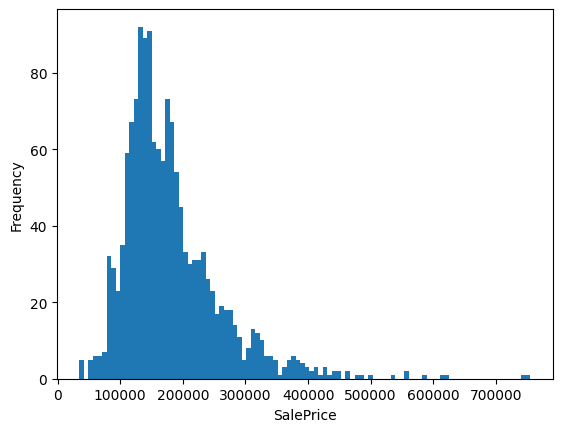

In [5]:
data['SalePrice'].plot(kind='hist', xlabel="SalePrice", bins=100)

In [6]:
data.shape

features =  data.drop(['SalePrice','Id'], axis=1)
target = data['SalePrice']

In [7]:
# num columns fillings

def num_filling(df1):
    size = df1.shape[0]*0.7
    num_columns = [x for x in df1.columns if df1[x].dtype!='object']
    for i in num_columns :
        nulls = sum(df1[i].isnull())
        if nulls > size:
            df1 = df1.drop([i],axis=1) 
    return df1
features = num_filling(features)

In [8]:
# cat columns fillings

def cat_filling(df1):
    size = df1.shape[0]*0.7
    cat_columns = [x for x in df1.columns if df1[x].dtype=='object']
    for i in cat_columns :
        nulls = sum(df1[i].isnull())
        if nulls > size:
            df1 = df1.drop([i],axis=1) 
    return df1
features = cat_filling(features)

In [9]:
def feature_engineering(test_data):
    test_data['Luxury_amen']=test_data['WoodDeckSF']+test_data['OpenPorchSF']+test_data['EnclosedPorch']+test_data['3SsnPorch']+test_data['ScreenPorch']+test_data['PoolArea']
    test_data['Tot_bathrooms']=test_data['BsmtFullBath']+0.5*test_data['BsmtHalfBath']+test_data['FullBath']+0.5*test_data['HalfBath']
    test_data['House_rating']=(test_data['OverallCond']+test_data['OverallQual'])//2
    test_data['Age_house']=test_data['YrSold']-test_data['YearRemodAdd']-test_data['YearBuilt']
    test_data['House_Area_sft']=test_data['TotalBsmtSF']+test_data['1stFlrSF']+test_data['2ndFlrSF']+test_data['GarageArea']+test_data['Luxury_amen']
    #df1["FlrSF"] = df1["1stFlrSF"]+df1["2ndFlrSF"];
    #df1 = df1.drop(["1stFlrSF","2ndFlrSF"],axis=1);
    #df1["Bath"] = df1["BsmtFullBath"] + df1["BsmtHalfBath"]+df1["FullBath"]+df1["HalfBath"];
    #df1 = df1.drop(["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath"],axis=1);
    return test_data
features = feature_engineering(features)

In [10]:
features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Luxury_amen,Tot_bathrooms,House_rating,Age_house,House_Area_sft
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,2008,WD,Normal,61,3.5,6,-1998,3175
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,5,2007,WD,Normal,298,2.5,7,-1945,3282
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,9,2008,WD,Normal,42,3.5,6,-1995,3356
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,2,2006,WD,Abnorml,307,2.0,6,-1879,3422
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,12,2008,WD,Normal,276,3.5,6,-1992,4455


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,RobustScaler,PowerTransformer,QuantileTransformer,LabelEncoder
from sklearn.compose import ColumnTransformer

num_imputer = SimpleImputer(strategy='most_frequent')
cat_imputer = SimpleImputer(strategy='constant', fill_value='Min')
std_scaler =  QuantileTransformer()     #QuantileTransformer()StandardScaler()
ohe_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
#label_encoder = LabelEncoder()

pipe_num = Pipeline([('imputer', num_imputer), ('scaler', std_scaler)])#, ('scaler', std_scaler)
pipe_cat = Pipeline([('imputer', cat_imputer), ('encoder', ohe_encoder)]) #, ('encoder', ohe_encoder)
                 
col_transformer = ColumnTransformer([('num_preproc', pipe_num, [x for x in features.columns if features[x].dtype!='object']),
                                         ('cat_preproc', pipe_cat, [x for x in features.columns if features[x].dtype=='object'])])                       

In [12]:
from sklearn import linear_model
clf = linear_model.ElasticNet(alpha=0.01,tol=0.001,max_iter=100000)

In [13]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor(learning_rate=0.05, max_depth=8, n_estimators=1000)
                        # n_estimators = 1000,
                        #max_depth = 8,
                        #subsample = 0.6
                        #min_child_weight = 60, 
                        #learning_rate = 0.02)
    

In [14]:
from lightgbm import LGBMRegressor
model_lgbm = LGBMRegressor(verbose = -1)

In [15]:
from catboost import CatBoostRegressor
model_cat = CatBoostRegressor(verbose= False,reg_lambda=0.001,grow_policy="Depthwise")
#model_cat = CatBoostRegressor(learning_rate = 0.06,
 #                           iterations = 1300,
  #                          depth = 7 , verbose= False)

In [16]:
from sklearn.pipeline import Pipeline
cat_pipe = Pipeline([('preproc',col_transformer),('model', model_cat)])
xgb_pipe = Pipeline([('preproc',col_transformer),('model', model_xgb)])
#el_pipe = Pipeline([('preproc',col_transformer),('model', clf)])
#lgbm_pipe = Pipeline([('preproc',col_transformer),('model', model_lgbm)])

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error,explained_variance_score,r2_score

In [18]:
def preperation(df):
    features_df_1 = df
    features_df_1 = num_filling(features_df_1)
    features_df_1 = cat_filling(features_df_1)
    features_df_1 = feature_engineering(features_df_1)                   
    return features_df_1

In [19]:
#from sklearn.model_selection import train_test_split

#for i in range(5):
#                features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=7+i)
#                target_train = np.log1p(target_train)
#                target_test = np.log1p(target_test)
#                xgb_pipe.fit(features_train, target_train)
#                preds = xgb_pipe.predict(features_test)
#                print("Mean absolute error =", round(mean_absolute_error(target_test, preds), 2)) 
#                print("Mean squared error =", round(mean_squared_error(target_test, preds), 2)) 
#                print("Median absolute error =", round(median_absolute_error(target_test, preds), 2)) 
#                print("Explain variance score =", round(explained_variance_score(target_test, preds), 4)) 
#                print("R2 score =", round(r2_score(target_test, preds), 4) , "\n\n\n")

In [20]:
from sklearn.model_selection import train_test_split

for i in range(5):
                features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=7+i)
                target_train = np.log1p(target_train)
                target_test = np.log1p(target_test)
                cat_pipe.fit(features_train, target_train)
                preds = cat_pipe.predict(features_test)
                print("Mean absolute error =", round(mean_absolute_error(target_test, preds), 2)) 
                print("Mean squared error =", round(mean_squared_error(target_test, preds), 2)) 
                print("Median absolute error =", round(median_absolute_error(target_test, preds), 2)) 
                print("Explain variance score =", round(explained_variance_score(target_test, preds), 4)) 
                print("R2 score =", round(r2_score(target_test, preds), 4) , "\n\n\n")


Mean absolute error = 0.08
Mean squared error = 0.01
Median absolute error = 0.06
Explain variance score = 0.9171
R2 score = 0.9169 



Mean absolute error = 0.07
Mean squared error = 0.01
Median absolute error = 0.05
Explain variance score = 0.9158
R2 score = 0.915 



Mean absolute error = 0.07
Mean squared error = 0.01
Median absolute error = 0.05
Explain variance score = 0.9333
R2 score = 0.9316 



Mean absolute error = 0.08
Mean squared error = 0.01
Median absolute error = 0.06
Explain variance score = 0.9171
R2 score = 0.9171 



Mean absolute error = 0.08
Mean squared error = 0.02
Median absolute error = 0.05
Explain variance score = 0.9021
R2 score = 0.9013 





In [21]:
from sklearn.model_selection import cross_val_score,ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(cat_pipe,features, np.log1p(target), cv=cv)

array([0.90908092, 0.90907497, 0.90100731, 0.91041012, 0.90124222])

In [22]:
#from sklearn.model_selection import train_test_split
#
#for i in range(5):
#                features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=7+i)
#                target_train = np.log1p(target_train)
#                target_test = np.log1p(target_test)
#                el_pipe.fit(features_train, target_train)
#                preds = el_pipe.predict(features_test)
#                print("Mean absolute error =", round(mean_absolute_error(target_test, preds), 2)) 
#                print("Mean squared error =", round(mean_squared_error(target_test, preds), 2)) 
#                print("Median absolute error =", round(median_absolute_error(target_test, preds), 2)) 
#                print("Explain variance score =", round(explained_variance_score(target_test, preds), 4)) 
#                print("R2 score =", round(r2_score(target_test, preds), 4) , "\n\n\n")

In [23]:
#from sklearn.model_selection import train_test_split

#for i in range(5):
#                features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=7+i)
#                target_train = np.log1p(target_train)
#                target_test = np.log1p(target_test)
#                lgbm_pipe.fit(features_train, target_train)
#                preds = lgbm_pipe.predict(features_test)
#                print("Mean absolute error =", round(mean_absolute_error(target_test, preds), 2)) 
#                print("Mean squared error =", round(mean_squared_error(target_test, preds), 2)) 
#                print("Median absolute error =", round(median_absolute_error(target_test, preds), 2)) 
#                print("Explain variance score =", round(explained_variance_score(target_test, preds), 4)) 
#                print("R2 score =", round(r2_score(target_test, preds), 4) , "\n\n\n")

In [24]:
cat_pipe.fit(features, np.log1p(target))
test_features = preperation(test)
preds_cat = cat_pipe.predict(test_features)
#xgb_pipe.fit(features, np.log1p(target))
#test_features = preperation(test)
#preds_xgb = xgb_pipe.predict(test_features)

In [25]:
sub = pd.DataFrame()
sub['Id'] = test["Id"]
sub['SalePrice'] = np.exp(preds_cat)
sub.to_csv('submission_1.csv',index=False)

In [26]:
'''
features =col_transformer.fit_transform(features)

from sklearn.model_selection import train_test_split
Best_params = [0,0,0,0]
score_max = 0
learning_rate_i = 0.05
iterations_i = 300
max_depth_i = 3
for learning_rate_i in np.arange(0.05,0.11,0.01) :
    for iterations_i in np.arange(300,1200,100) :
        for max_depth_i in np.arange(3,10,1):
            score_i = 0
            for i in range(3):
                features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=18+i)
                target_train = np.log1p(target_train)
                target_test = np.log1p(target_test)
                model_cat = CatBoostRegressor(learning_rate=learning_rate_i,iterations= iterations_i,  max_depth=max_depth_i, loss_function='RMSE', verbose= False)
                model_cat.fit(features_train, target_train)
                preds = model_cat.predict(features_test)
                #final_pipe.fit(features_train, target_train)
                #preds = final_pipe.predict(features_test)
                score_i += round(explained_variance_score(target_test, preds), 4)
                #print("Mean absolute error =", round(mean_absolute_error(target_test, preds), 2)) 
                #print("Mean squared error =", round(mean_squared_error(target_test, preds), 2)) 
                #print("Median absolute error =", round(median_absolute_error(target_test, preds), 2)) 
                #print("Explain variance score =", round(explained_variance_score(target_test, preds), 4)) 
                #print("R2 score =", round(r2_score(target_test, preds), 4) , "\n\n\n")\
                                                                          
            print(f"""Hyper params :                     learning_rate_i = {learning_rate_i}
                                 iterations_i = {iterations_i}
                                 max_depth_i = {max_depth_i} """)
            print(f"\n\nAverage score = {score_i/3}")
            
            if(score_i/3>score_max):
               print("New best params!")
               Best_params = [learning_rate_i,iterations_i,max_depth_i]
               score_max =score_i/3 
            print("-------------------")
'''

'\nfeatures =col_transformer.fit_transform(features)\n\nfrom sklearn.model_selection import train_test_split\nBest_params = [0,0,0,0]\nscore_max = 0\nlearning_rate_i = 0.05\niterations_i = 300\nmax_depth_i = 3\nfor learning_rate_i in np.arange(0.05,0.11,0.01) :\n    for iterations_i in np.arange(300,1200,100) :\n        for max_depth_i in np.arange(3,10,1):\n            score_i = 0\n            for i in range(3):\n                features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=18+i)\n                target_train = np.log1p(target_train)\n                target_test = np.log1p(target_test)\n                model_cat = CatBoostRegressor(learning_rate=learning_rate_i,iterations= iterations_i,  max_depth=max_depth_i, loss_function=\'RMSE\', verbose= False)\n                model_cat.fit(features_train, target_train)\n                preds = model_cat.predict(features_test)\n                #final_pipe.fit(features_tr